In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score
)
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('modelling_df.csv')

In [3]:

Y = df['Delay']
X = df.drop(['Delay'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Create DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Calculate approximate scale
#scale_pos_weight = (number of negative samples) / (number of positive samples)
scale_pos_weight = 519110 / 8435


params = {
    'tree_method': 'hist',  
    'device': 'cuda',    
    'objective': 'binary:logistic',
     'scale_pos_weight': 61.5,
}


bst = xgb.train(params, dtrain, num_boost_round=100)
preds = bst.predict(dtest)


In [4]:
# turn probabilities into 0/1 predictions and lower the threshold snce we care more about delas 
y_pred_labels = (preds > 0.3).astype(int)

In [5]:
print("Delay Recall (Sensitivity):", recall_score(y_test, y_pred_labels, pos_label=1))

Delay Recall (Sensitivity): 0.9359990247470438


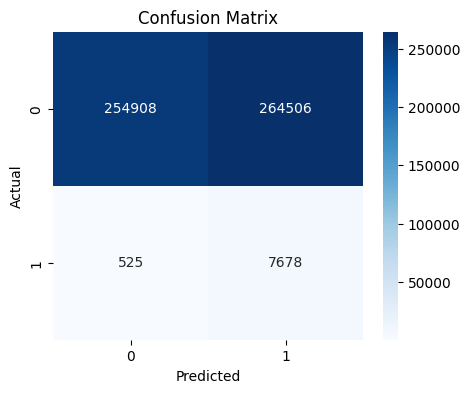

In [7]:

y_true = y_test
cm = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# ground truth is y_test
y_true = y_test.values  
print("Accuracy:", accuracy_score(y_true, y_pred_labels))
print("Precision:", precision_score(y_true, y_pred_labels))
print("Recall:", recall_score(y_true, y_pred_labels))
print("F1 Score:", f1_score(y_true, y_pred_labels))
print("ROC AUC:", roc_auc_score(y_true, preds))  # use raw probs for AUC


Accuracy: 0.4976829783725695
Precision: 0.028208858713223407
Recall: 0.9359990247470438
F1 Score: 0.05476716110233356
ROC AUC: 0.8327778574640048


In [9]:

importances = bst.get_score(importance_type='weight')


importance_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Importance': list(importances.values())
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                     Feature  Importance
82                      Hour       600.0
71       temperature_2m (°C)       301.0
77  relative_humidity_2m (%)       281.0
74    wind_direction_10m (°)       275.0
63                      -1.1       262.0
..                       ...         ...
1                       6662         6.0
12               41.69_41.69         6.0
9                41.66_41.66         6.0
46               42.04_42.04         5.0
47               42.05_42.05         4.0

[84 rows x 2 columns]


In [10]:
importance_df.to_csv('feature_importances.csv', index=False)

In [11]:

print("Precision:", precision_score(y_test, y_pred_labels))
print("Recall:", recall_score(y_test, y_pred_labels))
print("F1 Score:", f1_score(y_test, y_pred_labels))

# Bonus: Precision-Recall AUC
print("PR AUC:", average_precision_score(y_test, preds))  # use raw probability for this


Precision: 0.028208858713223407
Recall: 0.9359990247470438
F1 Score: 0.05476716110233356
PR AUC: 0.11005997162554565


In [12]:

print("Delay Precision:", precision_score(y_test, y_pred_labels, pos_label=1))
print("Delay F1 Score:", f1_score(y_test, y_pred_labels, pos_label=1))


Delay Precision: 0.028208858713223407
Delay F1 Score: 0.05476716110233356
